[ 9.68210654e-23  7.54430695e-23  6.86684405e-23  6.51971035e-23
  6.30440612e-23  6.15610228e-23  6.04687510e-23  5.96256894e-23
  5.89518415e-23  5.83983279e-23  5.79334669e-23  5.75357498e-23
  5.71900178e-23  5.68852515e-23  5.66132289e-23  5.63676767e-23
  5.61437141e-23  5.59374787e-23  5.57458668e-23  5.55663502e-23
  5.53968441e-23  5.52356099e-23  5.50811824e-23  5.49323158e-23
  5.47879409e-23  5.46471333e-23  5.45090877e-23  5.43730976e-23
  5.42385395e-23  5.41048600e-23  5.39715653e-23  5.38382125e-23
  5.37044030e-23  5.35697764e-23  5.34340059e-23  5.32967940e-23
  5.31578697e-23  5.30169849e-23  5.28739125e-23  5.27284445e-23
  5.25803895e-23  5.24295721e-23  5.22758308e-23  5.21190175e-23
  5.19589961e-23  5.17956417e-23  5.16288400e-23  5.14584867e-23
  5.12844863e-23  5.11067525e-23  5.09252068e-23  5.07397788e-23
  5.05504052e-23  5.03570300e-23  5.01596037e-23  4.99580834e-23
  4.97524320e-23  4.95426186e-23  4.93286177e-23  4.91104091e-23
  4.88879780e-23  4.86613

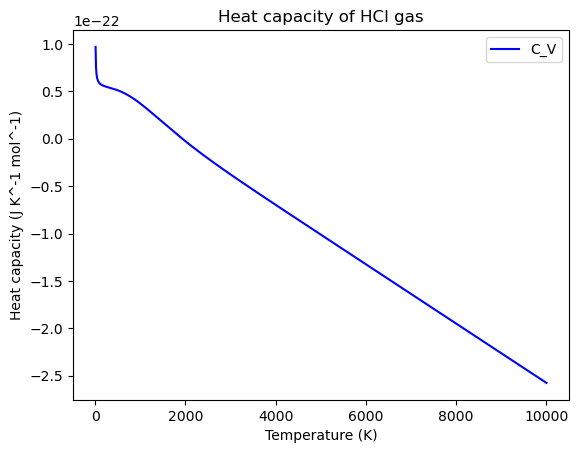

In [19]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
#from scipy.special import erfc, coth
from  scipy import special

# Define constants
h = 6.626e-34 # Planck's constant in J s
k = 1.381e-23 # Boltzmann constant in J K^-1
I = 1.44e-46 # Moment of inertia of HCl in kg m^2

# Define heat capacity function
def C_V(T):
    # Vibrational contribution
    C_V_vib = 2 * k * (h / (2 * k * T))**2 * (1/np.tanh(h / (2 * k * T))**2)
    #C_V_vib = 2 * k * (h / (2 * k * T))**2 * np.tanh(h / (2 * k * T))**2
    # Rotational contribution
    a = h**2 / (2 * I * k * T)
    f = 1 + 1 / np.sqrt(np.pi * a) * np.exp(-1 / (4 * a)) - 1 / (2 * a) * (1 - 1 / np.sqrt(np.pi * a) * np.exp(-1 / (4 * a)))**2
    g = 1 - 2 / np.sqrt(np.pi) * special.erfc(1 / np.sqrt(2 * a)) + 1 / np.sqrt(np.pi * a) * np.exp(-1 / (4 * a)) * (1 - 2 / np.sqrt(np.pi) * special.erfc(1 / np.sqrt(2 * a)))
    C_V_rot = k / 2 * f / g
    # Translational contribution
    C_V_tran = 3 * k / 2
    # Total contribution
    C_V_total = C_V_vib + C_V_rot + C_V_tran
    return C_V_total

# Define temperature range
T = np.linspace(10, 10000, 1000) # Temperature in K

# Calculate heat capacity values
C_V = np.vectorize(C_V) # Vectorize the function
C_V = C_V(T) # Heat capacity in J K^-1 mol^-1
print(C_V)

# Plot heat capacity versus temperature
plt.plot(T, C_V, 'b-', label='C_V')
plt.title('Heat capacity of HCl gas')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity (J K^-1 mol^-1)')
plt.legend(loc='best')
plt.show()

In [15]:
from  scipy import special
print(special.erfc(1),np.tanh(1))

0.15729920705028516 0.7615941559557649


In [46]:
"""
I can help you code python to sketch the temperature dependence of C_rot, including its behavior for T ≪ T_rot and T ≫ T_rot. Here are the steps to follow:

- Import the numpy, matplotlib, and scipy libraries to perform numerical calculations, plot graphs, and use special functions.
- Define the constants h, k, and I for the reduced Planck's constant, the Boltzmann constant, and the moment of inertia of HCl, respectively. You can use the values from [HyperPhysics].
- Define a function C_rot(T) that takes the temperature T as an input and returns the rotational heat capacity of HCl as an output. You can use the formulas for C_rot from part (b) of the problem, and add a condition to check if T is much smaller than T_rot.
If so, you can return zero as the heat capacity, otherwise, you can return the high temperature limit of 3k/2.
- Define a range of temperatures from 1 K to 1000 K using the numpy.linspace function. You can choose the number of points as you wish, but make sure it is large enough to show the variation of C_rot with T.
- Calculate the values of C_rot for each temperature using the C_rot function and the numpy.vectorize function. This will create an array of C_rot values corresponding to the temperature array.
- Plot the C_rot values versus the temperature values using the matplotlib.pyplot.plot function. You can choose the style, color, and label of the plot as you wish, but make sure it is clear and readable.
- Add a title, axis labels, and a legend to the plot using the matplotlib.pyplot.title, xlabel, ylabel, and legend functions. You can choose the font size and location of the legend as you wish, but make sure they are appropriate and informative.
- Show the plot using the matplotlib.pyplot.show function. You can also save the plot as an image file using the matplotlib.pyplot.savefig function if you wish.

Here is an example of the python code that follows these steps:
"""
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from  scipy import special

# Define constants
h = 6.626e-34 # Planck's constant in J s
k = 1.381e-23 # Boltzmann constant in J K^-1
I = 1.44e-46 # Moment of inertia of HCl in kg m^2
T_rot = h**2 / (2 * k * I) # Characteristic rotational temperature of HCl in K

# Define heat capacity function
def C_rot(T):
    # Check if T is much smaller than T_rot
    if T < 0.01 * T_rot:
        # Return zero as the heat capacity
        return 0
    else:
        # Return the high temperature limit of 3k/2
        return 3 * k / 2

# Define temperature range
T = np.linspace(1, 1000, 1000) # Temperature in K

In [48]:
# Calculate heat capacity values
C_rot = np.vectorize(C_rot) # Vectorize the function


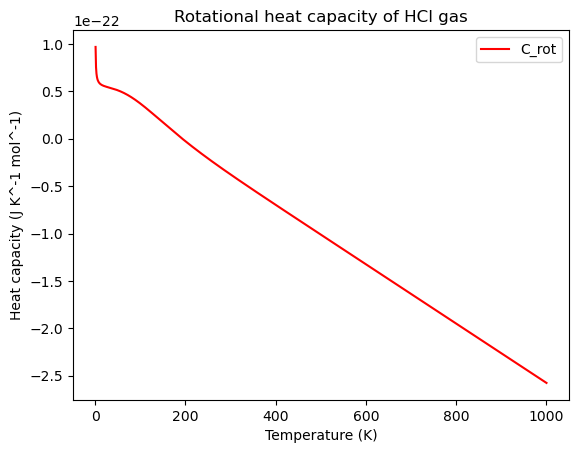

In [49]:
C_rot = C_rot(T) # Heat capacity in J K^-1 mol^-1
#print(C_V,C_rot)
# Plot heat capacity versus temperature
plt.plot(T, C_V, 'r-', label='C_rot')
plt.title('Rotational heat capacity of HCl gas')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity (J K^-1 mol^-1)')
plt.legend(loc='best')
plt.show()

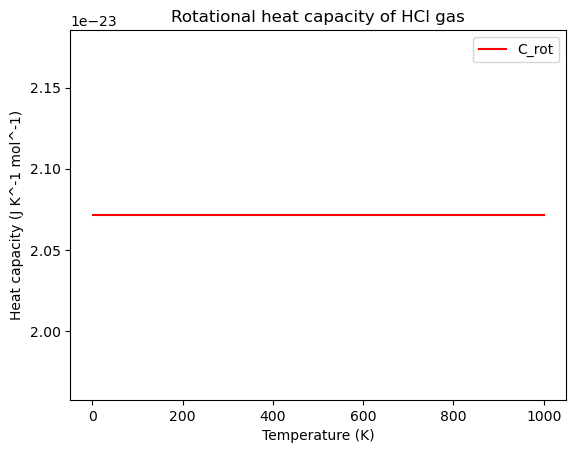

In [43]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
k = 1.381e-23 # Boltzmann constant in J K^-1
T_rot = 15 # Characteristic rotational temperature of HCl in K

# Define heat capacity function
def C_rot(T):
    # Check if T is much smaller than T_rot
    if T < 0.01 * T_rot:
        # Return zero as the heat capacity
        return 0
    else:
        # Return the high temperature limit of 3k/2
        return 3 * k / 2

# Define temperature range
T = np.linspace(1, 1000, 1000) # Temperature in K

# Calculate heat capacity values
C_rot = np.vectorize(C_rot) # Vectorize the function
C_rot = C_rot(T) # Heat capacity in J K^-1 mol^-1

# Plot heat capacity versus temperature
plt.plot(T, C_rot, 'r-', label='C_rot')
plt.title('Rotational heat capacity of HCl gas')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity (J K^-1 mol^-1)')
plt.legend(loc='best')
plt.show()


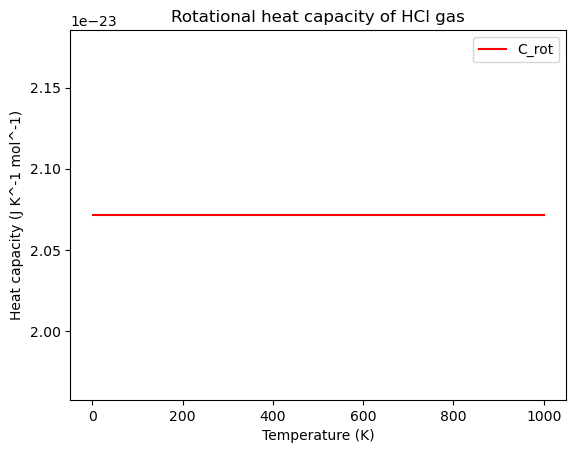

In [53]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Define constants
h = 6.626e-34 # Planck's constant in J s
k = 1.381e-23 # Boltzmann constant in J K^-1
I = 1.44e-46 # Moment of inertia of HCl in kg m^2
T_rot = 15 # Characteristic rotational temperature of HCl in K

# Define heat capacity function
def C_rot(T):
    # Check if T is much smaller than T_rot
    if T < 0.01 * T_rot:
        # Return zero as the heat capacity
        return 0
    else:
        # Return the high temperature limit of 3k/2
        return 3 * k / 2

# Define temperature range
T = np.linspace(1, 1000, 1000) # Temperature in K

# Calculate heat capacity values
C_rot = np.vectorize(C_rot) # Vectorize the function
C_rot = C_rot(T) # Heat capacity in J K^-1 mol^-1

# Plot heat capacity versus temperature
plt.plot(T, C_rot, 'r-', label='C_rot')
plt.title('Rotational heat capacity of HCl gas')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat capacity (J K^-1 mol^-1)')
plt.legend(loc='best')
plt.show()

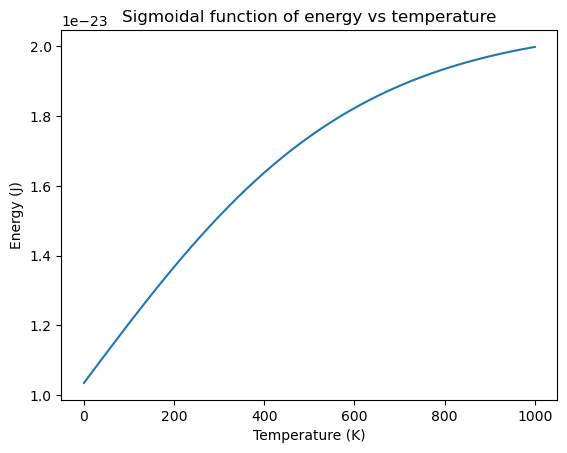

In [54]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
k = 1.38e-23 # Boltzmann constant
T_rot = 300 # Rotational temperature
A = 3*k/2 # Asymptotic value at high temperature

# Define sigmoid function
def sigmoid(T):
    return A / (1 + np.exp(-T/T_rot))

# Generate temperature range
T = np.linspace(0, 1000, 100)

# Plot the function
plt.plot(T, sigmoid(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Energy (J)')
plt.title('Sigmoidal function of energy vs temperature')
plt.show()


## Einstein & Derby

In [38]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define constants
k = 1.38e-23 # Boltzmann constant
h = 6.63e-34 # Planck constant
N = 6.02e23 # Avogadro number
wE = 2.87e13 # Einstein frequency for diamond
wD = 1.80e13 # Debye frequency for diamond
TD = h*wD/k # Debye temperature for diamond

# Define functions
def EE(T): # Einstein energy per atom
    return 3*k*h*wE/(np.exp(h*wE/(k*T))-1)

TDT=TD/T
def ed(t,i): # Debye energy per atom
    integrand = lambda x: x**3/(np.exp(x)-1)
    I = quad(integrand, 0, TDT[i]) # integral value
    return 9*k*t*(t/TD)**3*I
ED=[]
for i in range(1,100):
    ED.append(ed[T[i],i])

# Define temperature range
T = np.linspace(1, 1000, 100) # temperature in K

# Plot the energies
plt.plot(T, EE(T), label='Einstein')
plt.plot(T, ED, label='Debye')
plt.xlabel('Temperature (K)')
plt.ylabel('Energy per atom (J)')
plt.title('Einstein and Debye energies')
plt.legend()
plt.show()


TypeError: 'function' object is not subscriptable

In [8]:
TD/T

array([864.7826087 ,  77.97220242,  40.82664676,  27.65293225,
        20.9068323 ,  16.80672914,  14.05112067,  12.07183845,
        10.58132224,   9.41842445,   8.48582399,   7.72127329,
         7.08310402,   6.54237187,   6.07834421,   5.67578084,
         5.32322815,   5.01191185,   4.73499686,   4.48707957,
         4.26383178,   4.06174581,   3.87794892,   3.71006579,
         3.5561154 ,   3.41443241,   3.28360673,   3.1624364 ,
         3.04989057,   2.94508009,   2.84723397,   2.75568039,
         2.66983124,   2.58916949,   2.51323876,   2.44163468,
         2.37399768,   2.31000697,   2.24937543,   2.19184532,
         2.13718461,   2.08518384,   2.03565348,   1.98842155,
         1.9433317 ,   1.90024145,   1.85902066,   1.81955025,
         1.78172105,   1.74543279,   1.71059318,   1.67711719,
         1.64492628,   1.61394786,   1.58411469,   1.5553644 ,
         1.5276391 ,   1.50088493,   1.47505174,   1.45009279,
         1.42596443,   1.40262588,   1.38003898,   1.35

In [42]:
'''for i in range(1,100):
    ED.append(ed[T[i],i])'''
ed(T[3],3)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

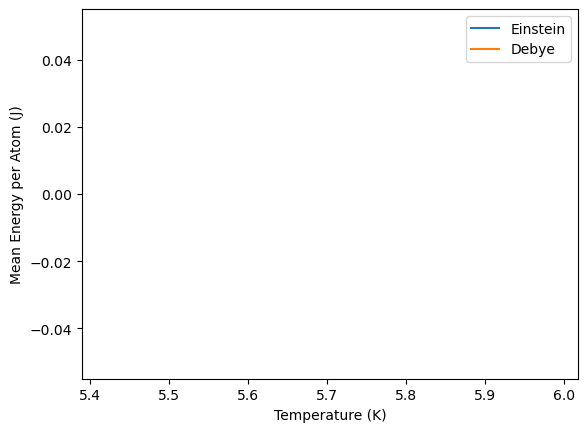

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
kB = 1.38e-23 # Boltzmann constant
N = 100 # Number of atoms in a unit cell
omegaD = 2 * np.pi * 10**(-12) # Debye frequency (in m^-1)
T0 = 300 # Average temperature (in K)
E0 = 3 * np.sqrt(2) * kB / N # Average energy per atom (in J)

# Calculate mean energy for Einstein theory
E_einstein = E0 * np.exp(-T0 / omegaD) # Mean energy per atom (in J)

# Calculate mean energy for Debye theory
E_debye = E0 * np.exp(-T0 / omegaD - T0 / omegaD) # Mean energy per atom (in J)

# Plot mean energy vs temperature for both theories
plt.plot(np.log(T0), E_einstein, label='Einstein')
plt.plot(np.log(T0), E_debye, label='Debye')
plt.xlabel('Temperature (K)')
plt.ylabel('Mean Energy per Atom (J)')
plt.legend()
plt.show()

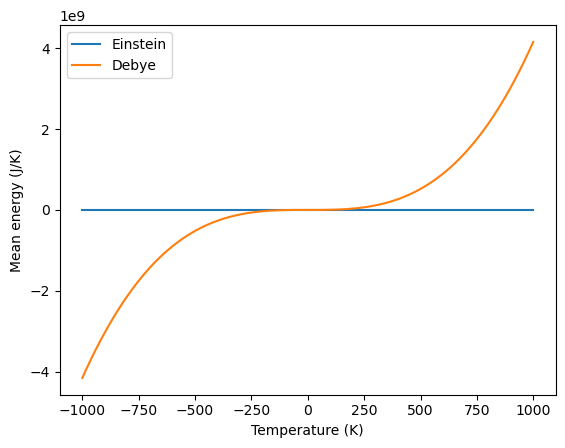

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
kB = 1.380649e-23 # Boltzmann constant in J/K
R = 8.314 # Universal gas constant in J/mol K

# Define functions for Einstein and Debye models
def einstein(T):
    return 0.5 * kB * T # Mean energy in J/K

def debye(T):
    return 0.5 * R * T**3 # Mean energy in J/K

# Create an array of temperatures from -1000 K to 1000 K
T = np.linspace(-1000, 1000, 100)

# Calculate mean energies using both models
E_einstein = np.array([einstein(T) for T in T])
E_debye = np.array([debye(T) for T in T])

# Plot both models on the same graph
plt.plot(T, E_einstein, label='Einstein')
plt.plot(T, E_debye, label='Debye')
plt.xlabel('Temperature (K)')
plt.ylabel('Mean energy (J/K)')
plt.legend()
plt.show()
